# The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).

In [2]:
from tensorflow.keras.datasets import mnist
# comment the above line an uncomment the below line if it throws errors 
# from keras.datasets import mnist

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [3]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [4]:
# The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images), len(train_labels)

(60000, 60000)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

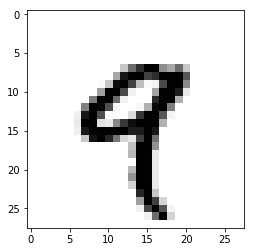

In [9]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [13]:
# remove tensorflow.keras from the below import statements if it throws errors
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
network.add(layers.Dense(10, activation = 'softmax'))


Here, our network consists of a sequence of two Dense layers, which are densely
connected (also called fully connected) neural layers. The second (and last) layer is a
10-way softmax layer, which means it will return an array of 10 probability scores (summing
to 1). Each score will be the probability that the current digit image belongs to
one of our 10 digit classes

A loss function—How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.


An optimizer—The mechanism through which the network will update itself
based on the data it sees and its loss function.


Metrics to monitor during training and testing—Here, we’ll only care about accuracy
(the fraction of the images that were correctly classified).

In [14]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Transforming data

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [16]:
from tensorflow.keras.utils import to_categorical 

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
network.fit(train_images, train_labels, epochs =5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2564 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1041 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0688 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0504 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0374 - acc: 0.9885


the network will start to iterate on the training data in mini-batches of 128 samples, 5 times over (each iteration over
all the training data is called an epoch). At each iteration, the network will compute the gradients of the weights with regard to the loss on the batch, and update the weights
accordingly. After these 5 epochs, the network will have performed 2,345 gradient
updates (469 per epoch = 60,000/128), and the loss of the network will be sufficiently low that the
network will be capable of classifying handwritten digits with high accuracy

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0767 - acc: 0.9773


0.9773